In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3_data/mean_hcn'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3_data/data_hcn/L{L},T{T},dt{dt:.1f},p{p},dir{d},s{sss}_hc.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}_hc.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}_hc.npy"), S_var)

In [ ]:
for L in [9]:
    for T in [10.0*L]:
        for p in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
            for d in ["Z2"]:
                for dt in[1.0]:
                    average_data(L,T,dt,p,d,500,10*L)

Debugging

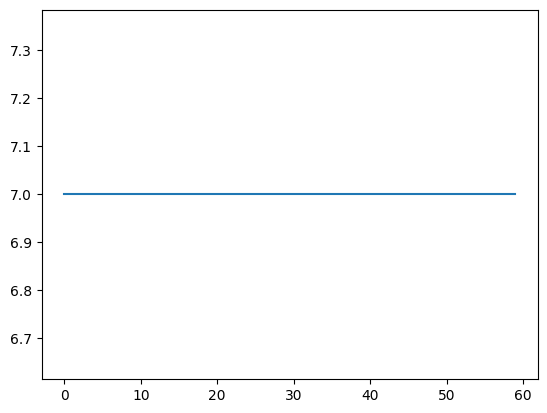

In [ ]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_qnvn/Emean_L7,T60.0,dt1.0,p0.0_qnv.npy")
plt.plot(data)

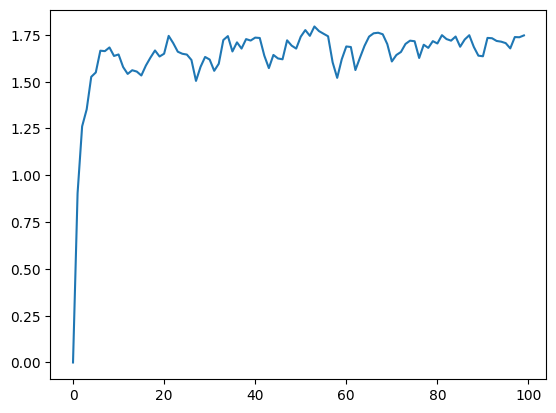

In [ ]:
data = np.load("("/Users/uditvarma/Documents/s3_data/mean_hcn/Emean_L8,T80.0,dt0.1,p0.0_hc.npy")
plt.plot(data)

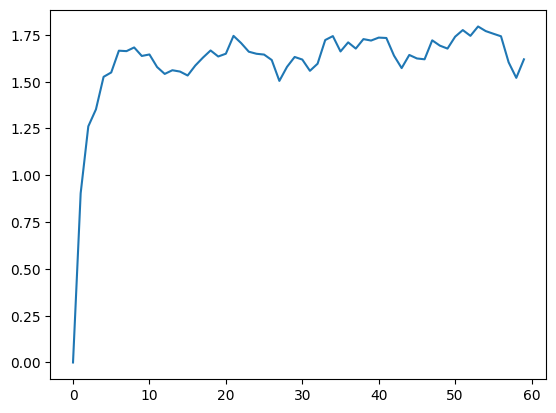

In [ ]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcn/Emean_L7,T60.0,dt1.0,p0.0_hc.npy")
plt.plot(data)

In [ ]:
data

array([-4.44089210e-16,  9.03863371e-01,  1.26142325e+00,  1.35224857e+00,
        1.52596647e+00,  1.54946012e+00,  1.66563857e+00,  1.66334687e+00,
        1.68300710e+00,  1.63751616e+00,  1.64553669e+00,  1.57837674e+00,
        1.54156512e+00,  1.56124271e+00,  1.55412339e+00,  1.53312019e+00,
        1.58634189e+00,  1.62864708e+00,  1.66686690e+00,  1.63468451e+00,
        1.64950560e+00,  1.74485085e+00,  1.70616606e+00,  1.66026482e+00,
        1.64927427e+00,  1.64490091e+00,  1.61599490e+00,  1.50426813e+00,
        1.57920046e+00,  1.63214905e+00,  1.61837057e+00,  1.55816123e+00,
        1.59607561e+00,  1.72259800e+00,  1.74358023e+00,  1.66159420e+00,
        1.71011574e+00,  1.67696332e+00,  1.72751614e+00,  1.71981047e+00,
        1.73555944e+00,  1.73354529e+00,  1.63926341e+00,  1.57265519e+00,
        1.64290960e+00,  1.62417226e+00,  1.61971201e+00,  1.72104035e+00,
        1.69272405e+00,  1.67690292e+00,  1.74052761e+00,  1.77581159e+00,
        1.74506504e+00,  

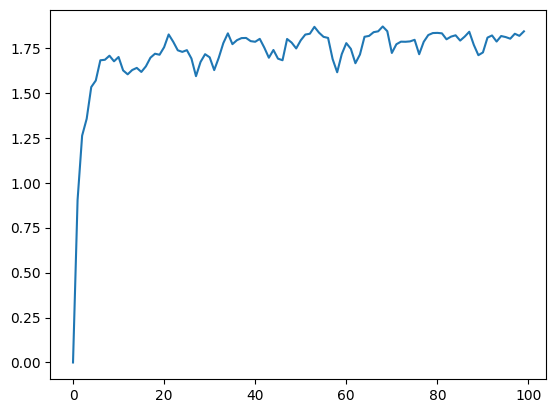

In [ ]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcn/Emean_L8,T100.0,dt1.0,p0.0_hc.npy")
plt.plot(data)

In [ ]:
data

100

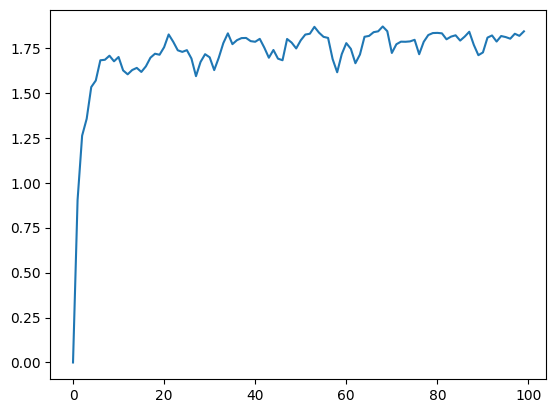

In [ ]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcn/Emean_L8,T100.0,dt1.0,p0.0_hc.npy")
plt.plot(data)

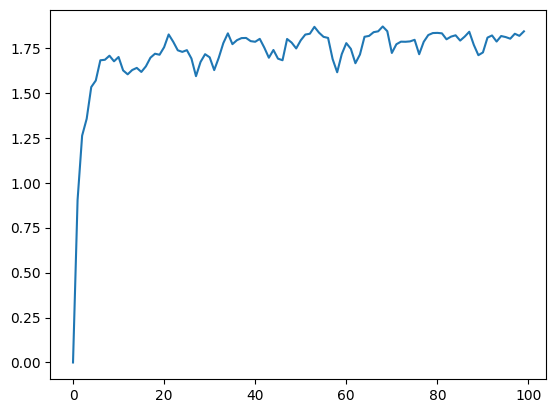

In [ ]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcn/Emean_L8,T100.0,dt1.0,p0.0_hc.npy")
plt.plot(data)

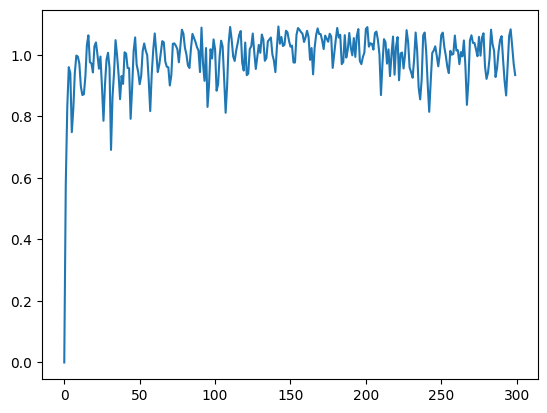

In [ ]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcn/Emean_L8,T300.0,dt1.0,p0.3_hc.npy")
plt.plot(data)

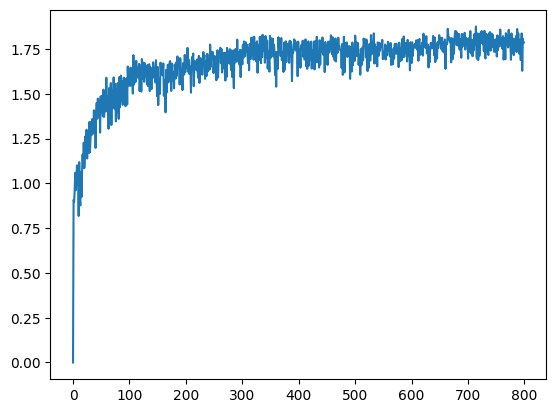

In [ ]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcn/Emean_L8,T80.0,dt0.1,p0.0_hc.npy")
plt.plot(data)

In [7]:
using Glob, Printf

# --- parameters (same as your run) ---
Ls = [6, 7, 8, 9, 10]
dts = [1.0]
ps = 0.0:0.1:1.0
shots = 1:500
Tfactor(L) = 10L  # total time scaling rule

# --- expected jobs ---
expected_jobs = [(L, Tfactor(L), dt, p) for L in Ls for dt in dts for p in ps]
expected_total = length(expected_jobs) * length(shots)

println("Total expected output files = $expected_total")

# --- function to parse filenames ---
function parse_filename(fname::String)
    # assumes name like: L8,T80.0,dt1.0,p0.0,dirZ2,s1_hc.npy
    m = match(r"L(\d+),T([\d\.]+),dt([\d\.]+),p([\d\.]+)", fname)
    if m === nothing
        return nothing
    end
    L  = parse(Int, m.captures[1])
    T  = parse(Float64, m.captures[2])
    dt = parse(Float64, m.captures[3])
    p  = parse(Float64, m.captures[4])
    return (L, T, dt, p)
end

# --- scan folder ---
function check_progress(folder::String)
    files = glob("*.npy", folder)
    parsed = filter(!isnothing, parse_filename.(basename.(files)))
    counts = Dict{Tuple{Int,Float64,Float64,Float64}, Int}()
    for job in parsed
        counts[job] = get(counts, job, 0) + 1
    end

    total_done = sum(values(counts))
    println("Progress: $total_done / $expected_total files done (",
            @sprintf("%.2f", 100 * total_done / expected_total), "%)")

    # show breakdown per (L,p) if useful
    for job in sort(collect(keys(counts)))
        println("  Job $job : $(counts[job]) / $(length(shots)) shots")
    end
end

Total expected output files = 27500


check_progress (generic function with 1 method)

In [8]:
check_progress("/Users/uditvarma/Documents/s3_data/data_hcn")

Progress: 22631 / 27500 files done (82.29%)
  Job (6, 60.0, 1.0, 0.0) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.1) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.2) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.3) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.4) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.5) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.6) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.7) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.8) : 500 / 500 shots
  Job (6, 60.0, 1.0, 0.9) : 500 / 500 shots
  Job (6, 60.0, 1.0, 1.0) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.0) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.1) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.2) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.3) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.4) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.5) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.6) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.7) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.8) : 500 / 500 shots
  Job (7, 70.0, 1.0, 0.9) : 500 / 500 shots
  Job (7, 70.0, 1.0, 1.0) : 500 